In [1]:
import pandas as pd
import csv
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# This function should transform data into a usable format 
def audioProcess(path):
    data = pd.read_csv(path)
    #get audio data from loudness to vect148
    audioData = data.loc[:, "loudness":"vect_148"]
    
    return audioData.values.tolist()

In [3]:
# This function should transform data into a usable format 
def textProcess(path):
    data = pd.read_csv(path)
    #get audio data from vect1 to vect148
    textData = data.loc[:, "tags"]
    
    return textData.values.tolist()

In [4]:
# This function should transform data into a usable format 
def labelProcess(path):
    data = pd.read_csv(path)
    #get classes
    labels = data.loc[:,"genre"].values.tolist()
    
    
    return labels

In [5]:
def train(trainData, trainLabel, model):
    model.fit(trainData, trainLabel)
                 
    print("train finish")

In [6]:
def predict(testData, model):
    prediction = model.predict(testData)
    return prediction

In [7]:
def evaluate(test_label, prediction):
    accuracy = metrics.accuracy_score(test_label, prediction)
    return accuracy

DATA Preprocess

In [8]:
trainText = np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validText= np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testText = np.array(textProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [9]:
#Create BOW
trainTxt = []
validTxt = []
testTxt = []
for i in range(len(trainText)):
    trainTxt.append(trainText[i].replace(",", ""))
    
for i in range(len(validText)):
    validTxt.append(validText[i].replace(",", ""))   
    
for i in range(len(testText)):
    testTxt.append(testText[i].replace(",", ""))   
    
vectorizer = CountVectorizer() 
trainVectors = vectorizer.fit_transform(trainTxt)
validVectors = vectorizer.transform(validTxt)
testVectors = vectorizer.transform(testTxt)

In [11]:
trainAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testAudio = np.array(audioProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [12]:
trainData = np.column_stack((trainVectors.toarray(),trainAudio))
validData = np.column_stack((validVectors.toarray(),validAudio))
testData = np.column_stack((testVectors.toarray(),testAudio))

In [13]:
trainLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_labels.csv")
validLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_labels.csv")

Training

In [17]:
k = 49
classifier = KNeighborsClassifier(n_neighbors=k)
train(trainData, trainLabel, classifier)

train finish


In [18]:
prediction = predict(validData, classifier)

In [19]:
accuracy = evaluate(validLabel, prediction)
print(accuracy)

0.34444444444444444


Predict

In [21]:
trackID = pd.read_csv(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv").loc[:, "trackID"].values.tolist()
prediction = predict(testData, classifier)
result = list(zip(trackID,prediction))

In [23]:
with open("all_outPut.csv", 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["trackID", "genre"])
    writer.writerows(result)

K's optimization

In [15]:
#training
accuracies=[]

for k in range(1,101):
    print("train: " + str(k))
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainData, trainLabel)
    prediction = classifier.predict(validData)
    accuracy = metrics.accuracy_score(validLabel, prediction)
    accuracies.append(accuracy)

train: 1
train: 2
train: 3
train: 4
train: 5
train: 6
train: 7
train: 8
train: 9
train: 10
train: 11
train: 12
train: 13
train: 14
train: 15
train: 16
train: 17
train: 18
train: 19
train: 20
train: 21
train: 22
train: 23
train: 24
train: 25
train: 26
train: 27
train: 28
train: 29
train: 30
train: 31
train: 32
train: 33
train: 34
train: 35
train: 36
train: 37
train: 38
train: 39
train: 40
train: 41
train: 42
train: 43
train: 44
train: 45
train: 46
train: 47
train: 48
train: 49
train: 50
train: 51
train: 52
train: 53
train: 54
train: 55
train: 56
train: 57
train: 58
train: 59
train: 60
train: 61
train: 62
train: 63
train: 64
train: 65
train: 66
train: 67
train: 68
train: 69
train: 70
train: 71
train: 72
train: 73
train: 74
train: 75
train: 76
train: 77
train: 78
train: 79
train: 80
train: 81
train: 82
train: 83
train: 84
train: 85
train: 86
train: 87
train: 88
train: 89
train: 90
train: 91
train: 92
train: 93
train: 94
train: 95
train: 96
train: 97
train: 98
train: 99
train: 100


The optimal value for K is 49


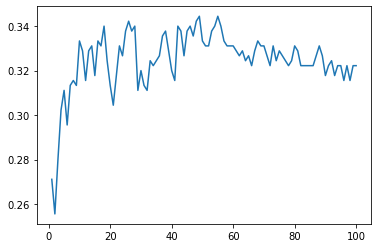

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,101), accuracies)
print("The optimal value for K is {}".format(accuracies.index(max(accuracies)) + 1))

In [17]:
max(accuracies)

0.34444444444444444